<a href="https://colab.research.google.com/github/HardikPrabhu/Mathematical-Foundations-OF-Principal-Component-Analysis/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Implementation of PCA

Let matrix X denote the entire data (mxn matrix). The rows of X are the n-dimenisonal data points, which are denoted as xi. No. of rows = no. of data points. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Let us look at a visual demonstration for 2 dimensional dataset.

In [106]:
#lets assume data has a 2-variate  gaussian distribution
mu = np.array([1,1])
cov = np.array([[0.5,0.2],[0.2,0.5]]) #symmetric
A = np.random.multivariate_normal(mu, cov, 100)
print(A)


[[ 0.44436782  1.00491693]
 [ 0.85496772  1.12344906]
 [ 0.64188627  0.36028065]
 [ 0.00801485  1.38466254]
 [ 0.21989988  1.44225468]
 [ 0.5884716   0.86490574]
 [ 0.32629436  0.46932127]
 [ 0.16595418  0.47067827]
 [ 1.2432536   2.29157682]
 [ 0.81682857  2.09366241]
 [ 0.65183849  0.68928513]
 [ 0.325112    0.96402138]
 [ 0.55916003  0.70166366]
 [ 1.25249197  0.75539268]
 [ 1.06428605  0.40236289]
 [ 0.86214374  2.03955341]
 [ 0.84213935  1.38188761]
 [ 1.36991776  0.40627417]
 [ 1.5709865   1.3987613 ]
 [ 1.04699283  1.41229022]
 [ 1.9756712   1.17740742]
 [-0.05601191  0.28806904]
 [ 1.00674402  0.97633828]
 [ 1.56010382  0.82695126]
 [ 1.24420946  1.60457236]
 [ 0.78953075  1.9901669 ]
 [ 2.41666546  0.34835287]
 [ 1.20618424  1.38807382]
 [ 0.54149456  0.73971254]
 [ 1.12465959  0.58715865]
 [ 0.811506    1.6735376 ]
 [ 0.58666107  1.37950612]
 [ 1.02307472  0.83317542]
 [ 1.36536218  0.91574678]
 [ 1.43809183  0.41609373]
 [ 0.3119231  -0.32119047]
 [ 0.30307202 -0.10229675]
 

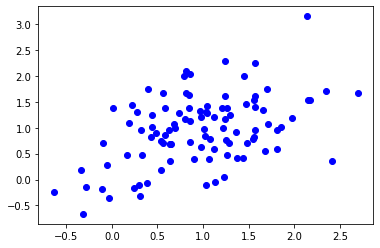

In [107]:
X=A[:,0]
Y=A[:,1]
plt.figure(0)
plt.plot(X,Y,'bo')

Now we centre the data by removing the mean.


In [108]:
mean=A.mean(0)
for i in range(len(A)):
  A[i]=A[i]-mean 

Now that we have centered the mean, the sample covariance matrix is given by:
$C =
\frac{1}{m - 1}
X^{\top}X$

In [191]:
C=1/99*A.transpose().dot(A)
print(C)

[[0.42689624 0.19671816]
 [0.19671816 0.43887189]]


Lets do singular value decomposition to get orthomnormal eigenvectors (principal components)

In [192]:
U, D, VT = np.linalg.svd(C)

In [193]:
#columns of U are over principal components
P1=U[:,0]
P2=U[:,1]
print(D)


[0.62969334 0.23607479]


Projection along the first component:
$z=  p_{1}^{\top}x p_{1}$, which is the projection along direction p1.
Since $X$ has ith entry $x_{i}^{\top}$.
The projection for each data point is given as 
$XP_{1}P_{1}^\top$

In [194]:
Z1=A.dot(P1.reshape((-1, 1)))
Z1=Z1.dot(np.array([P1]))

Z2=A.dot(P2.reshape((-1, 1)))
Z2=Z2.dot(np.array([P2]))


(-3.0, 3.0)

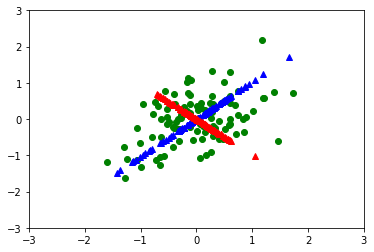

In [195]:
X=A[:,0]
Y=A[:,1]
plt.figure(1)
plt.plot(X,Y,'go')
X=Z1[:,0]
Y=Z1[:,1]
plt.plot(X,Y,'b^')
X=Z2[:,0]
Y=Z2[:,1]
plt.plot(X,Y,'r^')

plt.xlim(-3, 3)
plt.ylim(-3,3)

  
#Blue: Projection along PC1
#Red: Projection along PC2

In [190]:
A.shape[1]

2

In [212]:
def PCA(A,k): #FEED THE DATA MATRIX, k=NO. OF COMPONENTS <no. of col in A  
   if k>A.shape[1]:
     return "Not Possible"
   else:
     m=A.shape[0]  #remove mean
     mean=A.mean(0)
     C=1/(m-1)*A.transpose().dot(A)
     #lets take SVD of sample cov matrix C
     U, D, VT = np.linalg.svd(C)
     P=[] #list containing components
     for i in range(k):
       P.append(U[:,i]) #first K principle components
     #projection on first k components
     print(P)
     F=P[0]
     S=A.dot(F.reshape((-1, 1)))
     S=S.dot(np.array([F])) 
     
     for i in range(1,k):
       F=P[i]
       print(F)
       Z=A.dot(F.reshape((-1, 1)))
       Z=Z.dot(np.array([F])) 
       S=S+Z
     return (S,P)   #S is the projected dataset on the set P of Principle components
           



       
         






In [216]:
PCA(A,1)

[array([-0.69626701, -0.71778287])]


(array([[-0.22699875, -0.23401341],
        [ 0.03129368,  0.03226071],
        [-0.45341315, -0.46742441],
        [-0.24875242, -0.2564393 ],
        [-0.11725041, -0.12087365],
        [-0.22711219, -0.23413035],
        [-0.55191318, -0.56896826],
        [-0.62896594, -0.64840209],
        [ 0.80332342,  0.82814751],
        [ 0.49768639,  0.51306577],
        [-0.28416235, -0.29294347],
        [-0.30525082, -0.3146836 ],
        [-0.32290533, -0.33288367],
        [ 0.04006557,  0.04130366],
        [-0.22760754, -0.234641  ],
        [ 0.49261266,  0.50783525],
        [ 0.1542341 ,  0.1590002 ],
        [-0.0774863 , -0.07988076],
        [ 0.51600321,  0.5319486 ],
        [ 0.26873882,  0.27704332],
        [ 0.60156369,  0.62015305],
        [-0.82783473, -0.85341627],
        [ 0.03135163,  0.03232045],
        [ 0.22495475,  0.23190624],
        [ 0.46044359,  0.47467211],
        [ 0.43272894,  0.44610102],
        [ 0.40101692,  0.41340905],
        [ 0.33381027,  0.344